In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_json("dataset_amazon/dataset_es_train.json", lines = True)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [6]:
data.tail(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
199990,es_0723466,product_es_0697723,reviewer_es_0227474,5,Muy bueno y materiales muy bien. Facil de empa...,Julio,es,pc
199991,es_0775418,product_es_0114270,reviewer_es_0414316,5,Mi gato pesa 5 kg y entra perfectamente. Muy p...,Muy cómodo!,es,pet_products
199992,es_0685612,product_es_0636932,reviewer_es_0720131,5,"Muy buen producto , juego muy divertido y entr...",Muy bien,es,toy
199993,es_0950799,product_es_0712641,reviewer_es_0827348,5,"Si la primera parte me gustó, el desenlace me ...",La droga +dura 2,es,digital_ebook_purchase
199994,es_0492837,product_es_0961132,reviewer_es_0386222,5,Funcional. Buena calidad/precio.,Precio,es,other
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy
199999,es_0859809,product_es_0378794,reviewer_es_0141717,5,"Súper bien! Las brochas son buenas, no sé meno...",Preciosas,es,home


In [7]:
data.shape

(200000, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


In [9]:
data.product_category.value_counts()

home                        26962
wireless                    25886
toy                         13647
sports                      13189
pc                          11191
home_improvement            10879
electronics                 10385
beauty                       7337
automotive                   7143
kitchen                      6695
apparel                      5737
drugstore                    5513
book                         5264
furniture                    5229
baby_product                 4881
office_product               4771
lawn_and_garden              4237
other                        3937
pet_products                 3713
personal_care_appliances     3573
luggage                      3328
camera                       3029
shoes                        2754
digital_ebook_purchase       1843
video_games                  1733
jewelry                      1598
musical_instruments          1530
watch                        1490
industrial_supplies          1482
grocery       

In [13]:
# Ver cantidad de usuarios que valoraron con cada número estrellas las distintas categorías
data_grouped = data.review_id.groupby([data['product_category'],data['stars']]).count().astype(int).reset_index(name='count')
data_grouped[:50]

,product_category,stars,count
0,apparel,1,1273
1,apparel,2,1205
2,apparel,3,1200
3,apparel,4,1131
4,apparel,5,928
5,automotive,1,1515
6,automotive,2,1389
7,automotive,3,1485
8,automotive,4,1441
9,automotive,5,1313


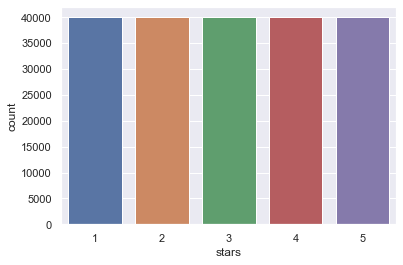

In [28]:
sns.countplot(x=data['stars'],data=data,hue='product_category')
plt.show()

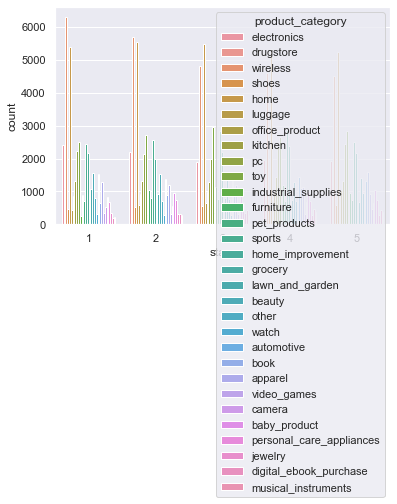

In [4]:
sns.countplot(x=data['stars'],data=data, hue='product_category')
#plt.bar(x=data['stars'], height=10,data=data)
#plt.figure(figsize=(26,10))
plt.show()

In [23]:
# Ver cuántos usuarios únicos publicaron
print("De las", data.shape[0],"reseñas, sólo", len(data.reviewer_id.unique()), "fueron hechas por usuarios únicos.")
print("Esto equivale al", len(data.reviewer_id.unique())/data.shape[0]*100,"%")

De las 200000 reseñas, sólo 179076 fueron hechas por usuarios únicos.
Esto equivale al 89.538 %


In [24]:
# Ver sobre cuántos productos únicos se publicaron reseñas
print("De las", data.shape[0],"reseñas, sólo se mencionan", len(data.product_id.unique()), "productos únicos.")
print("Esto equivale al", len(data.product_id.unique())/data.shape[0]*100,"%")

De las 200000 reseñas, sólo se mencionan 150938 productos únicos.
Esto equivale al 75.469 %


In [3]:
# Previamente
# python -m spacy download es
# python -m spacy download es_core_news_sm
import spacy # https://spacy.io/usage/models
# import es_core_news_sm
nlp = spacy.load('es_core_news_sm')

#Stop Words de es_core_news_sm
from spacy.lang.es.stop_words import STOP_WORDS
stopwords_spacy = list(STOP_WORDS)

In [4]:
#Stop Words de nltk
import nltk
from nltk.corpus import stopwords
stop_words_nltk = set(stopwords.words('spanish'))

**Stopwords de spaCy:** https://github.com/explosion/spaCy/blob/master/spacy/lang/es/stop_words.py
<br> vs<br>
**Stopwords de NLTK:** https://github.com/Alir3z4/stop-words/blob/bd8cc1434faeb3449735ed570a4a392ab5d35291/spanish.txt

Está bastante mejor el de NLTK porque spaCy tiene palabras como "bueno" y "bien"

In [6]:
# Nos quedamos con las columnas del dataset que son relevantes para predecir la valoración en general
# Por eso se descartan las columnas de id de usuario y producto
# La de categoría nos puede servir para relacionar palabras
# La del idioma es redundante
df = data[['product_category','review_title','review_body','stars']]
df.head()

,product_category,review_title,review_body,stars
0,electronics,television Nevir,Nada bueno se me fue ka pantalla en menos de 8...,1
1,electronics,Dinero tirado a la basura con esta compra,"Horrible, nos tuvimos que comprar otro porque ...",1
2,drugstore,solo llega una unidad cuando te obligan a comp...,Te obligan a comprar dos unidades y te llega s...,1
3,wireless,PRODUCTO NO RECIBIDO.,"No entro en descalificar al vendedor, solo pue...",1
4,shoes,Devuelto,Llega tarde y co la talla equivocada,1


In [18]:
# Miramos una review al azar
index_random = np.random.randint(0,df.shape[0])
review = df.review_body.iloc[index_random]
print(index_random, review)

84697 CALIDAD PRECIO ESTA BIEN, UNICO ES DE COLOR ROJO QUE DEJO DE FUNCIONAR EN MENOS DE UNA SEMANA,ESTARIA BIEN SI TENDRIA OPCION DE LUZ FIJA, SIN MOVIMIENTO


In [57]:
# Pasar todo a minúscula y quitar lo que no sea texto o espacio
import re
# from nltk.tokenize import RegexpTokenizer
frase_sin_punct = re.sub("[^a-zA-Z | .]", " ", str(review.lower())) # re.sub(pattern, repl, string, count=0, flags=0) --> Return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl.
print(frase_sin_punct,'\n')

# Tokenizar
doc = nlp(frase_sin_punct)
# print(doc)
rev = []
for token in doc:
    if(token.is_stop == False):
        rev.append(token)
        print(token)

calidad precio esta bien  unico es de color rojo que dejo de funcionar en menos de una semana estaria bien si tendria opcion de luz fija  sin movimiento 

calidad
precio
 
unico
color
rojo
dejo
funcionar
semana
estaria
tendria
opcion
luz
fija
 
movimiento


In [58]:
# Lemmatización
rev_lemma = []
rev_lemma = [w.lemma_ for w in rev if not w.pos_ == 'SPACE'] # Lemmatizamos y filtramos espacios
rev_lemma

# rev_lemma.clear()

['calidad',
 'precio',
 'unico',
 'color',
 'rojo',
 'dejar',
 'funcionar',
 'semana',
 'estario',
 'tendriar',
 'opcion',
 'luz',
 'fijar',
 'movimiento']

In [61]:
df.stars.iloc[index_random]

3

In [64]:
palabra = 'tendría'
palabra = nlp(palabra)
palabra.lemma_

AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'lemma_'